In [2]:
#IMPORT BASIC LIBRARIES 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#LOAD THE DATASET
df = pd.read_csv("Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
#DETERMINE THE SHAPE OF THE DATASET
df.shape

(1000, 40)

# there are 1000 rows and 40 colums

In [5]:
#TO CHECK NULL VALUES PRESENT OR NOT
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# _c39 columns with 100 % null value. We have to drop it.

In [11]:
#drop the column _c39
df.drop(columns='_c39',axis=1,inplace=True)

In [12]:
#to know the unique values
df.isnull().nunique()

months_as_customer             1
age                            1
policy_number                  1
policy_bind_date               1
policy_state                   1
policy_csl                     1
policy_deductable              1
policy_annual_premium          1
umbrella_limit                 1
insured_zip                    1
insured_sex                    1
insured_education_level        1
insured_occupation             1
insured_hobbies                1
insured_relationship           1
capital-gains                  1
capital-loss                   1
incident_date                  1
incident_type                  1
collision_type                 1
incident_severity              1
authorities_contacted          1
incident_state                 1
incident_city                  1
incident_location              1
incident_hour_of_the_day       1
number_of_vehicles_involved    1
property_damage                1
bodily_injuries                1
witnesses                      1
police_rep

In [13]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [6]:
#TO CHECK WHETHER DUPLICATE VALUES PRESENT OR NOT
df.duplicated().sum()

0

# There is no duplicate data present

In [7]:
#columns of dataset
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
#first 5 rows of the dataset
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [10]:
df.describe ()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [14]:
#to know the data types
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [15]:
#statistoical information about the dataset
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [16]:
for i in df:
    print(i)
    print(df[i].value_counts())
    print("\n")


months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996 

In [17]:
catgorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catgorical_col.append(i)
        
numerical_col=[]
for i in df.dtypes.index:
     if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
        numerical_col.append(i)

        
datetime_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='datetime64[ns]':
        datetime_col.append(i)

In [18]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='most_frequent') 
for i in catgorical_col:
    column_data = df[i].values.reshape(-1, 1)
    df[i]=imputer.fit_transform(column_data)

In [19]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [21]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_date']

0     2014-10-17
1     2006-06-27
2     2000-06-09
3     1990-05-25
4     2014-06-06
         ...    
995   1991-07-16
996   2014-05-01
997   2003-02-17
998   2011-11-18
999   1996-11-11
Name: policy_bind_date, Length: 1000, dtype: datetime64[ns]

In [22]:
df['incident_date']=pd.to_datetime(df['incident_date'])
df['incident_date']

0     2015-01-25
1     2015-01-21
2     2015-02-22
3     2015-10-01
4     2015-02-17
         ...    
995   2015-02-22
996   2015-01-24
997   2015-01-23
998   2015-02-26
999   2015-02-26
Name: incident_date, Length: 1000, dtype: datetime64[ns]

In [23]:
# Extracting Day, Month and Year column 
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_day']

0      17
1      27
2       9
3      25
4       6
       ..
995    16
996     1
997    17
998    18
999    11
Name: policy_bind_day, Length: 1000, dtype: int64

In [24]:
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_month']

0      10
1       6
2       6
3       5
4       6
       ..
995     7
996     5
997     2
998    11
999    11
Name: policy_bind_month, Length: 1000, dtype: int64

In [25]:
df['policy_bind_year'] = df['policy_bind_date'].dt.year
df['policy_bind_year']

0      2014
1      2006
2      2000
3      1990
4      2014
       ... 
995    1991
996    2014
997    2003
998    2011
999    1996
Name: policy_bind_year, Length: 1000, dtype: int64

In [26]:
# Extracting Day, Month and Year column 
df['incident_day'] = df['incident_date'].dt.day
df['incident_day']

0      25
1      21
2      22
3       1
4      17
       ..
995    22
996    24
997    23
998    26
999    26
Name: incident_day, Length: 1000, dtype: int64

In [27]:
df['incident_month'] = df['incident_date'].dt.month
df['incident_month']

0       1
1       1
2       2
3      10
4       2
       ..
995     2
996     1
997     1
998     2
999     2
Name: incident_month, Length: 1000, dtype: int64

In [28]:
df['incident_year'] = df['incident_date'].dt.year
df['incident_year'] 

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
995    2015
996    2015
997    2015
998    2015
999    2015
Name: incident_year, Length: 1000, dtype: int64

In [29]:
#drop the 2 columns policy blind date and incident date becaue we already have separate columns for day month and year
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [30]:
#drop the column
df.drop(['incident_year'],axis=1,inplace=True)

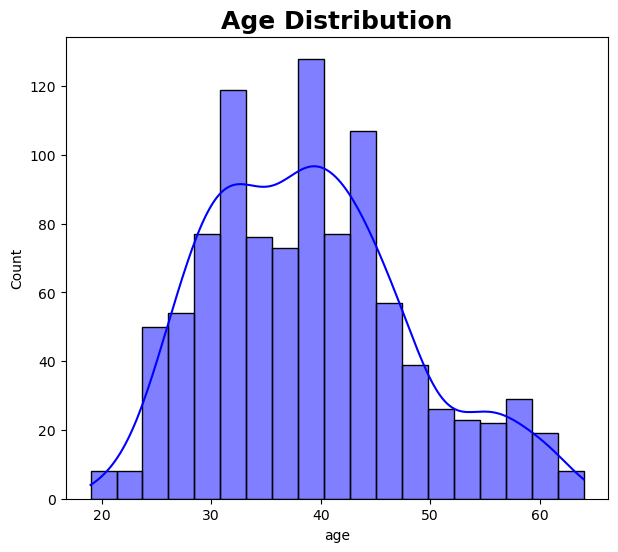

In [31]:
#plot the age distribution 
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [32]:
#separete categorical values
category=df.select_dtypes(include=['object']).columns

In [33]:
#separate numerical values
num=df._get_numeric_data().columns

In [34]:
# to check is there any '?' in the data set which is always treated as nul values
df.isin(['?']).sum().any()

True

In [35]:
df=df.replace('?',np.NaN)

In [36]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,52080,Saab,92x,2004,Y,17,10,2014,25,1
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,3510,Mercedes,E400,2007,Y,27,6,2006,21,1
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,23100,Dodge,RAM,2007,N,9,6,2000,22,2
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,1,10
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,4550,Accura,RSX,2009,N,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,61040,Honda,Accord,2006,N,16,7,1991,22,2
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,72320,Volkswagen,Passat,2015,N,1,5,2014,24,1
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,52500,Suburu,Impreza,1996,N,17,2,2003,23,1
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,36540,Audi,A5,1998,N,18,11,2011,26,2


In [37]:
# to check is there any ' ',NA,- in the data set which is always treated as nulL values
df.isin([' ','NA','-']).sum().any()


False

In [38]:
#Again check for null values
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [39]:
#fill using mode method
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)

In [40]:
#fill using mode method
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)

In [41]:
#fill using mode method
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [42]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,52080,Saab,92x,2004,Y,17,10,2014,25,1
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,3510,Mercedes,E400,2007,Y,27,6,2006,21,1
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,23100,Dodge,RAM,2007,N,9,6,2000,22,2
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,1,10
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,4550,Accura,RSX,2009,N,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,61040,Honda,Accord,2006,N,16,7,1991,22,2
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,72320,Volkswagen,Passat,2015,N,1,5,2014,24,1
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,52500,Suburu,Impreza,1996,N,17,2,2003,23,1
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,36540,Audi,A5,1998,N,18,11,2011,26,2


In [94]:
#Again check for null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

# EDA

Y    247
N    753
Name: fraud_reported, dtype: int64


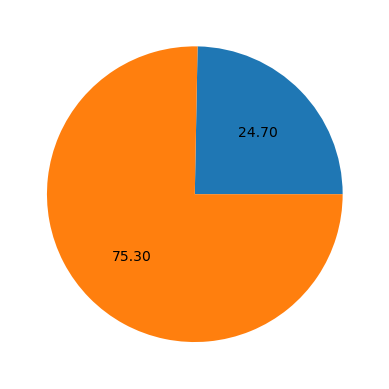

In [43]:
count_Type_of_glass=(df['fraud_reported'].value_counts().sort_values())
print(count_Type_of_glass)

plt.pie(x=count_Type_of_glass,autopct='%.2f',pctdistance=0.6, labeldistance=2)
plt.show()

<AxesSubplot:xlabel='months_as_customer', ylabel='Count'>

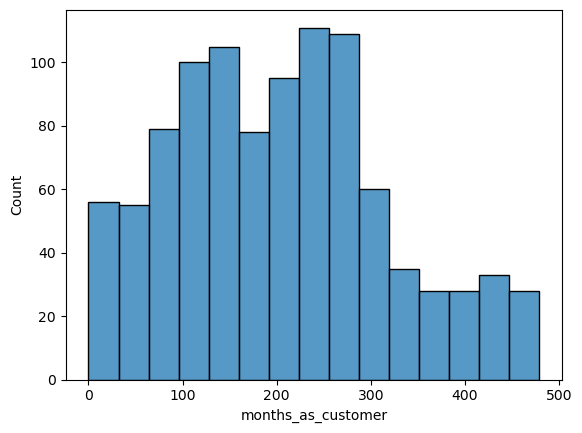

In [44]:
sns.histplot(x='months_as_customer',data=df)

# Age vs Fraud cases

<AxesSubplot:xlabel='age', ylabel='Count'>

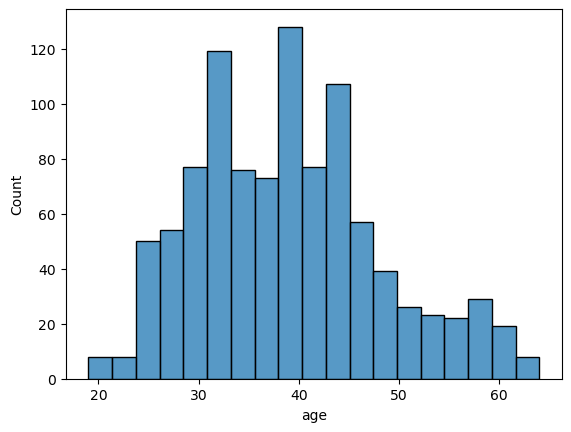

In [45]:
sns.histplot(x='age',data=df)

# Maximum fraud cases comes from people with age group of 30-44 year. Very few cases in 60 year old peoples.

# policy_state vs fraud_reported

<AxesSubplot:xlabel='policy_state', ylabel='Count'>

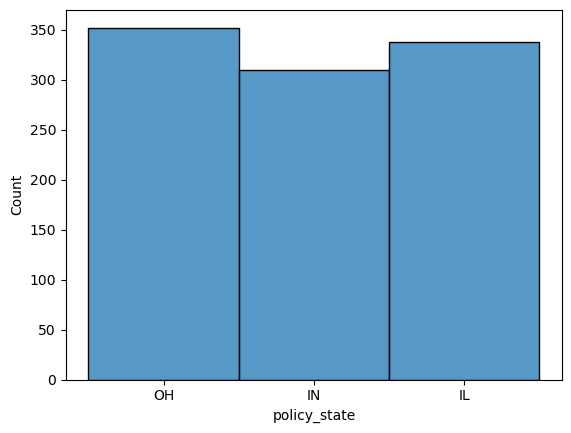

In [46]:
sns.histplot(x='policy_state',data=df)

<AxesSubplot:xlabel='policy_csl', ylabel='Count'>

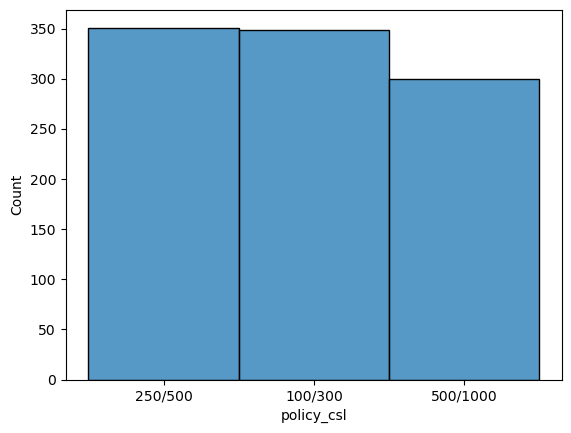

In [47]:
sns.histplot(x='policy_csl',data=df)

<AxesSubplot:xlabel='policy_deductable', ylabel='Count'>

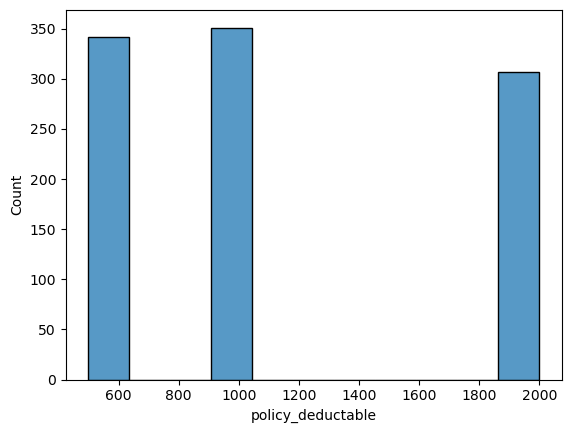

In [48]:
sns.histplot(x='policy_deductable',data=df)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Count'>

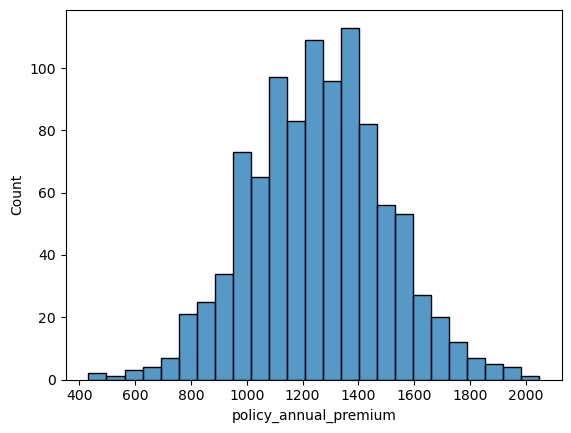

In [49]:
sns.histplot(x='policy_annual_premium',data=df)

<AxesSubplot:xlabel='umbrella_limit', ylabel='Count'>

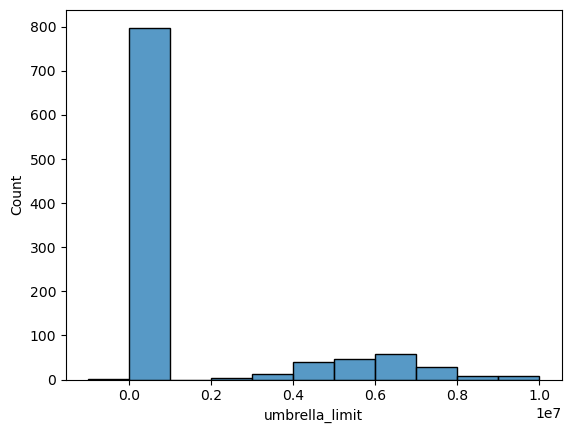

In [50]:
sns.histplot(x='umbrella_limit',data=df)

<AxesSubplot:xlabel='insured_zip', ylabel='Count'>

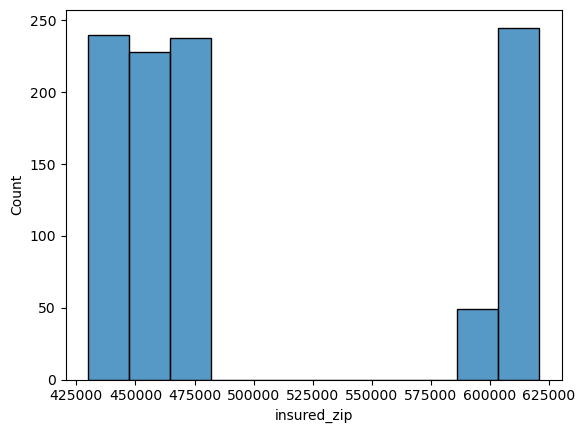

In [51]:
sns.histplot(x='insured_zip',data=df)

<AxesSubplot:xlabel='witnesses', ylabel='Count'>

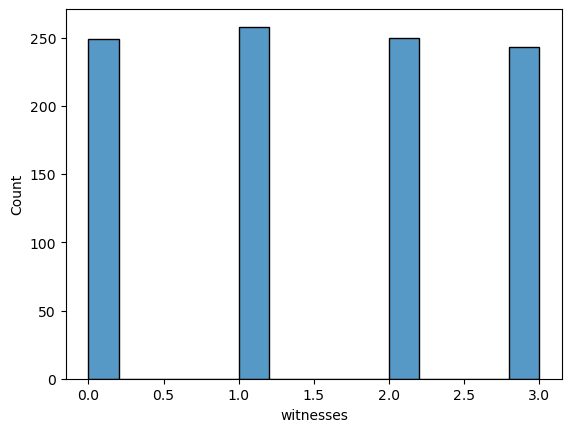

In [52]:
sns.histplot(x='witnesses',data=df)

NO     686
YES    314
Name: police_report_available, dtype: int64

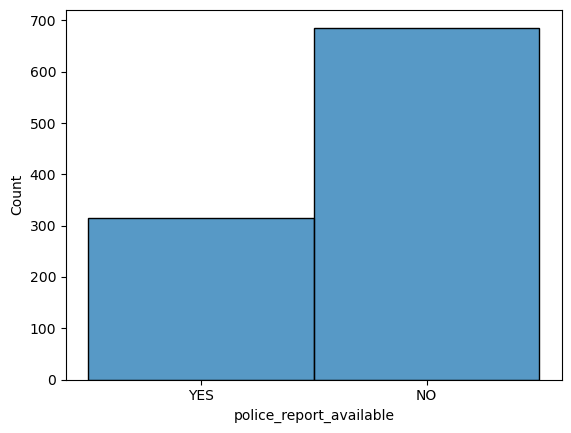

In [53]:
sns.histplot(x='police_report_available',data=df)
df['police_report_available'].value_counts()


<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

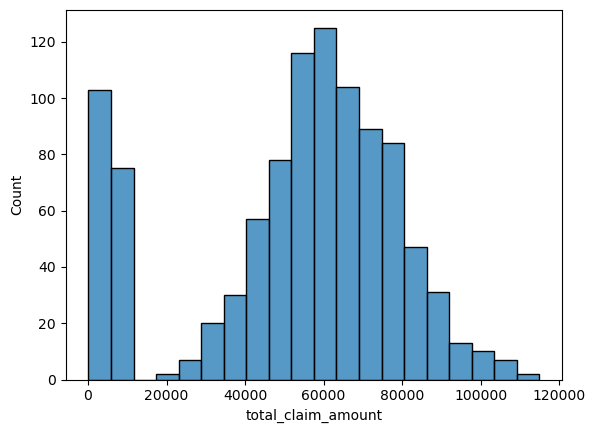

In [54]:
sns.histplot(x='total_claim_amount',data=df)

<AxesSubplot:xlabel='umbrella_limit', ylabel='Count'>

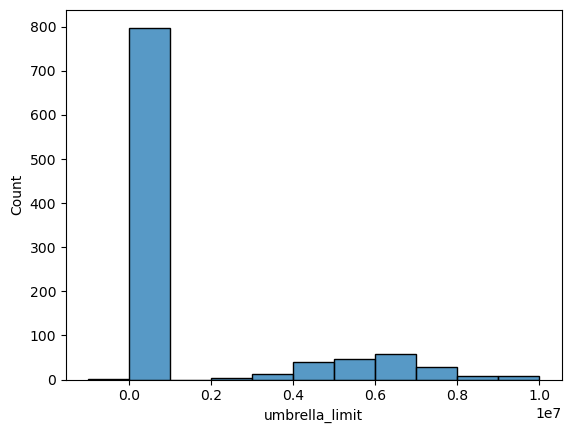

In [55]:
sns.histplot(x='umbrella_limit',data=df)

<AxesSubplot:xlabel='insured_zip', ylabel='Count'>

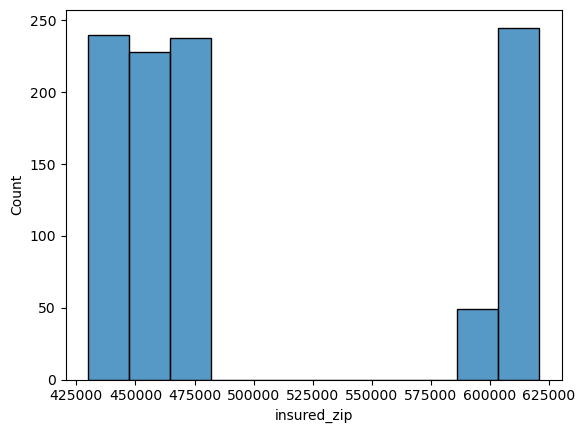

In [56]:
sns.histplot(x='insured_zip',data=df)

<AxesSubplot:xlabel='witnesses', ylabel='Count'>

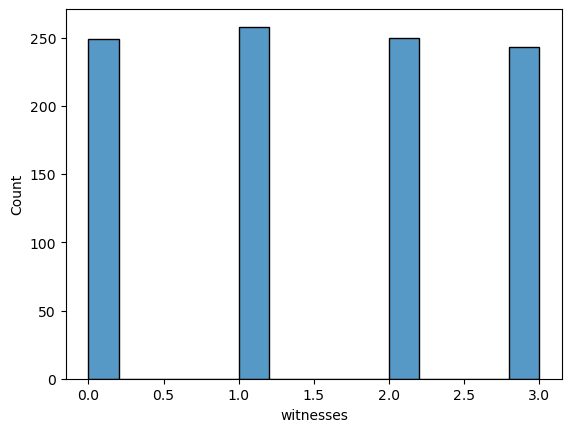

In [57]:
sns.histplot(x='witnesses',data=df)

NO     686
YES    314
Name: police_report_available, dtype: int64

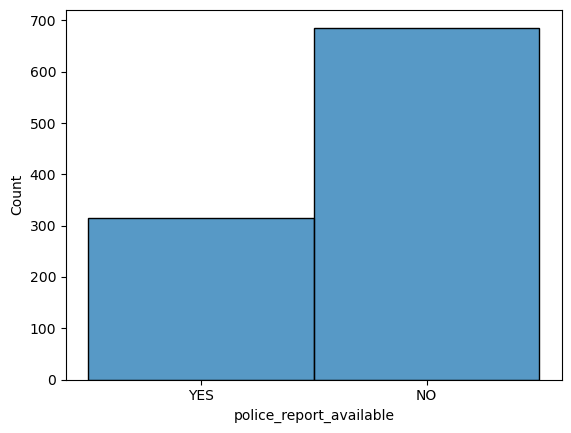

In [58]:
sns.histplot(x='police_report_available',data=df)
df['police_report_available'].value_counts()

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

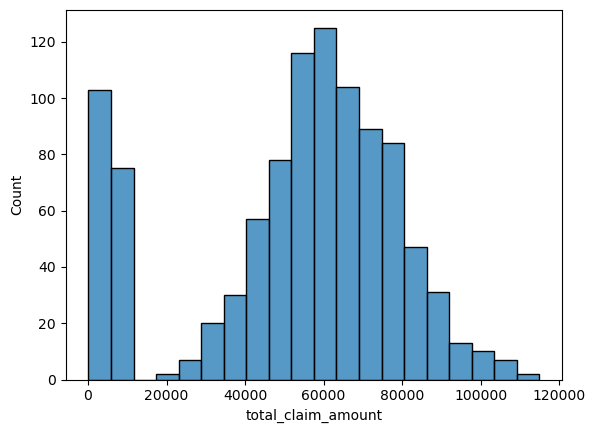

In [59]:
sns.histplot(x='total_claim_amount',data=df)

<AxesSubplot:xlabel='injury_claim', ylabel='Count'>

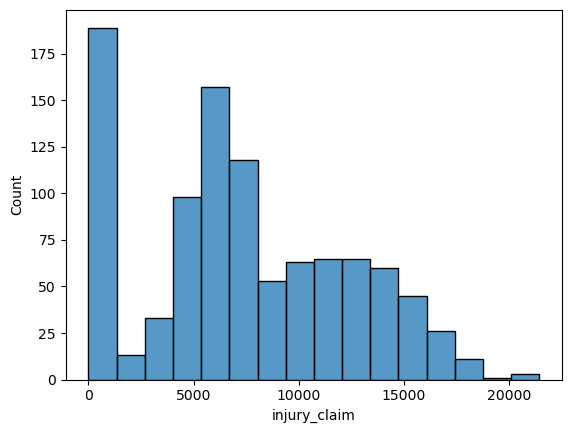

In [60]:
sns.histplot(x='injury_claim',data=df)

<AxesSubplot:xlabel='property_claim', ylabel='Count'>

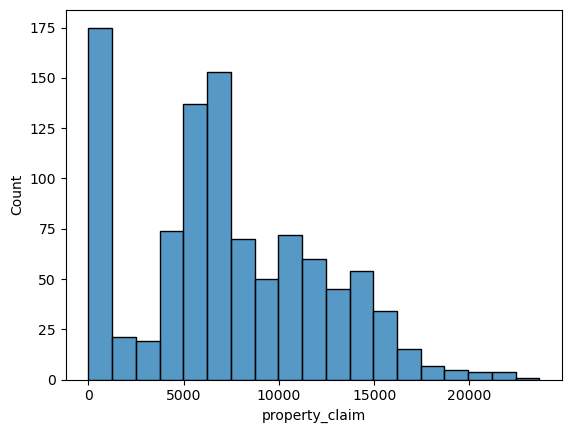

In [61]:
sns.histplot(x='property_claim',data=df)

<AxesSubplot:xlabel='vehicle_claim', ylabel='Count'>

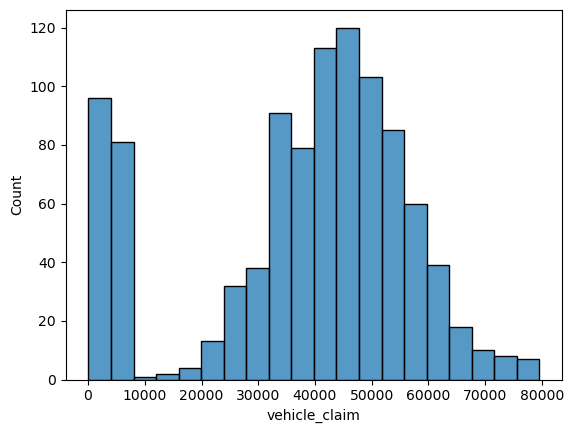

In [62]:
sns.histplot(x='vehicle_claim',data=df)

<AxesSubplot:xlabel='auto_make', ylabel='Count'>

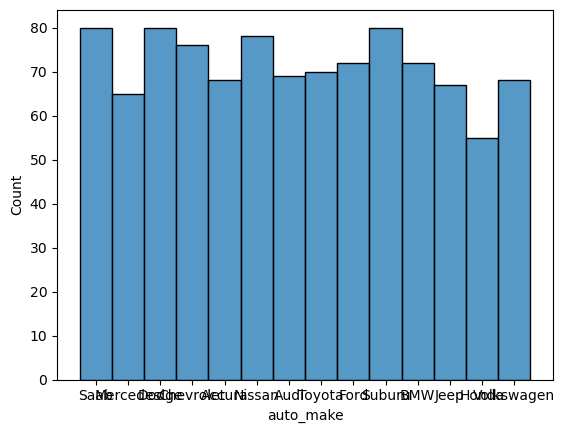

In [63]:
sns.histplot(x='auto_make',data=df)

<AxesSubplot:xlabel='auto_year', ylabel='Count'>

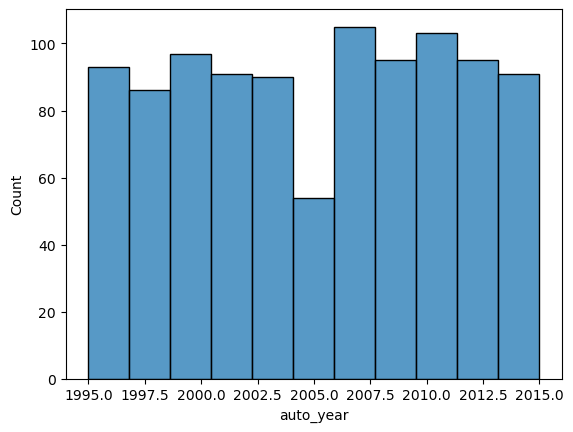

In [64]:
sns.histplot(x='auto_year',data=df)

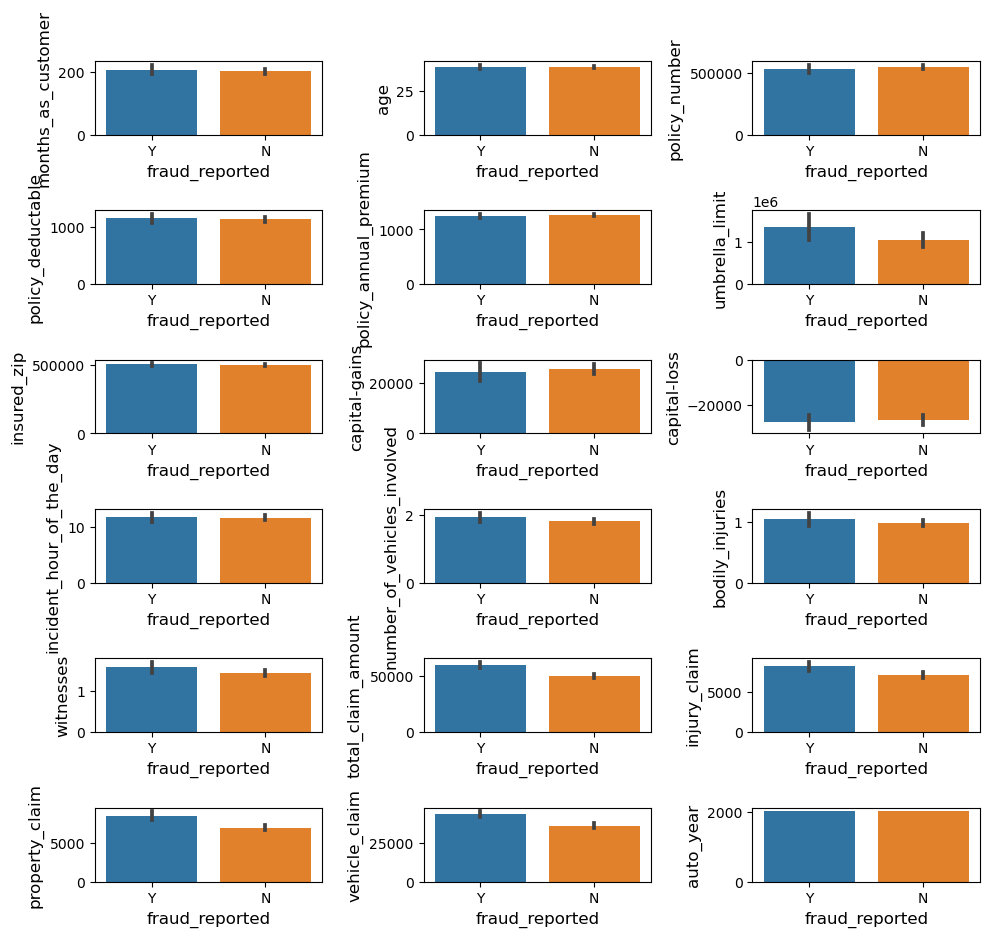

In [65]:
plt.figure(figsize=(10, 10))
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 30:
        ax = plt.subplot(7, 3, plotnumber)
        sns.barplot(x='fraud_reported', y=column, data=df)
        plt.xlabel('fraud_reported', fontsize=12)
        plt.ylabel(column, fontsize=12)
    plotnumber += 1

plt.tight_layout()
plt.show()

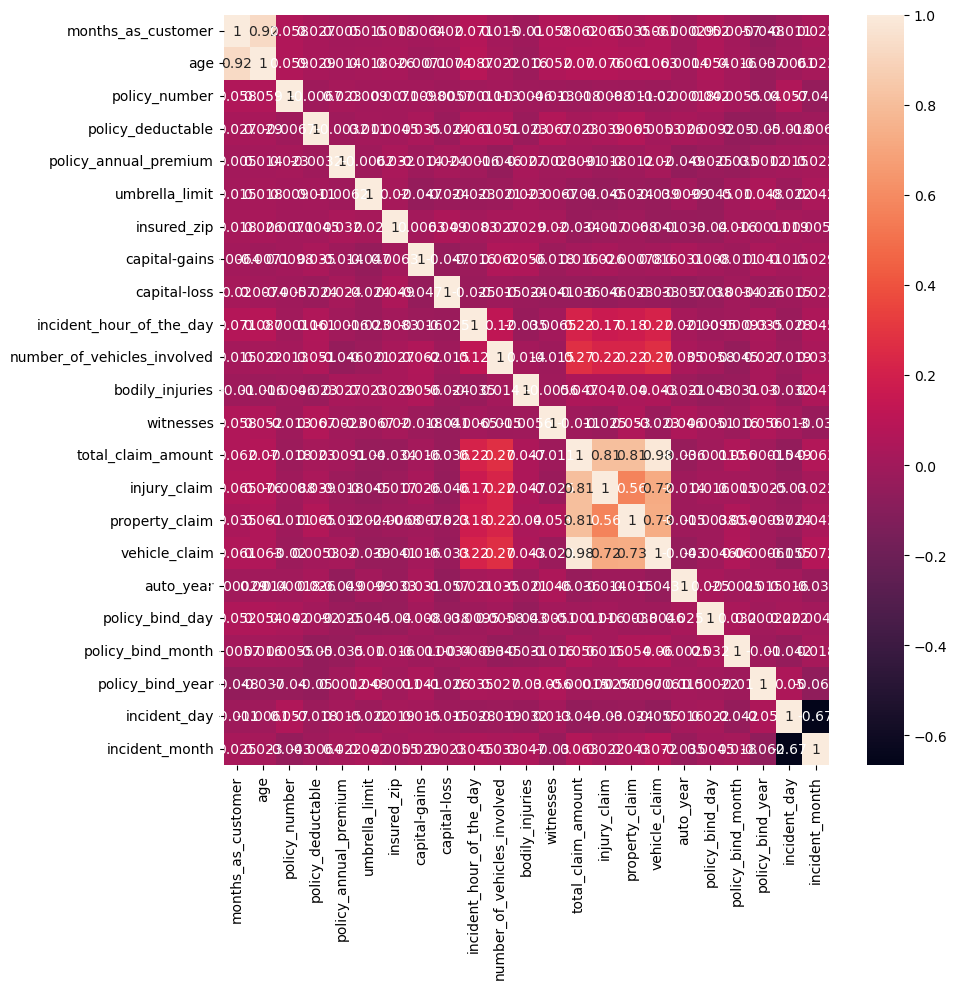

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2g')
plt.tight_layout()

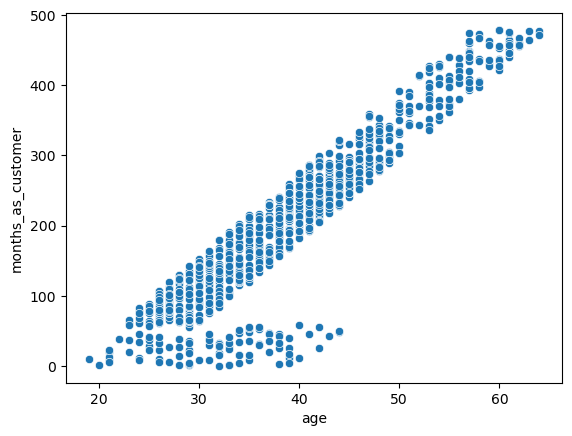

In [67]:
sns.scatterplot(x='age',y='months_as_customer',data=df)
plt.show()

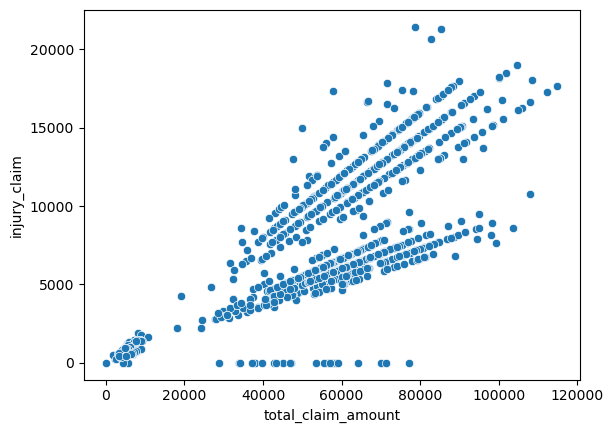

In [68]:
sns.scatterplot(x='total_claim_amount',y='injury_claim',data=df)
plt.show()

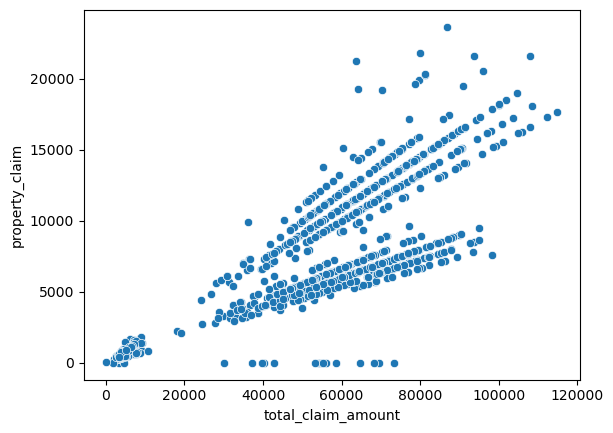

In [69]:
sns.scatterplot(x='total_claim_amount',y='property_claim',data=df)
plt.show()

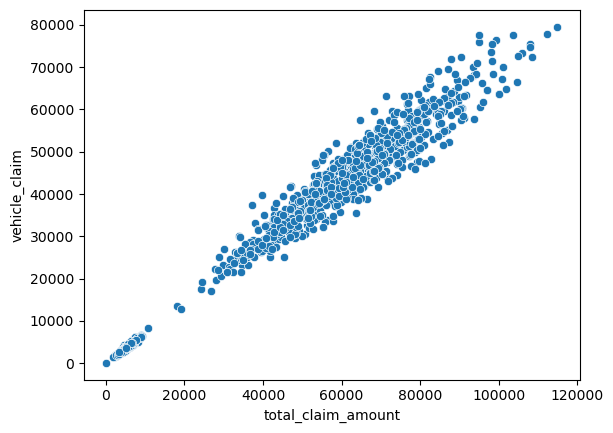

In [70]:
sns.scatterplot(x='total_claim_amount',y='vehicle_claim',data=df)
plt.show()

In [71]:
pd.crosstab(df['incident_type'], df['incident_severity'])

incident_severity,Major Damage,Minor Damage,Total Loss,Trivial Damage
incident_type,,,,
Multi-vehicle Collision,144,130,145,0
Parked Car,0,42,0,42
Single Vehicle Collision,132,136,135,0
Vehicle Theft,0,46,0,48


<AxesSubplot:xlabel='policy_annual_premium', ylabel='total_claim_amount'>

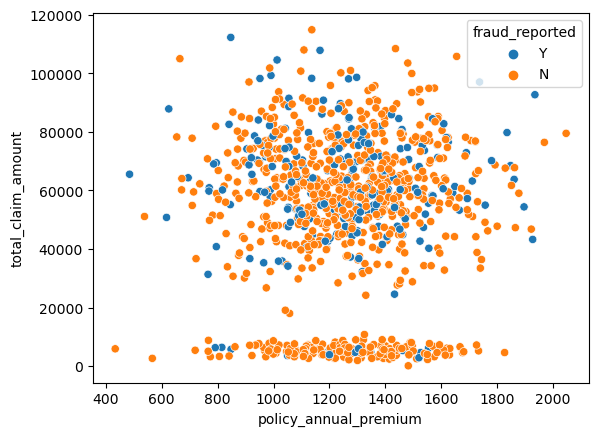

In [72]:
sns.scatterplot(df['policy_annual_premium'], df['total_claim_amount'], hue=df['fraud_reported'])

In [73]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in category:
    df[i] = le.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,52080,10,1,2004,1,17,10,2014,25,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,3510,8,12,2007,1,27,6,2006,21,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,23100,4,30,2007,0,9,6,2000,22,2
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,50720,3,34,2014,1,25,5,1990,1,10
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,4550,0,31,2009,0,6,6,2014,17,2


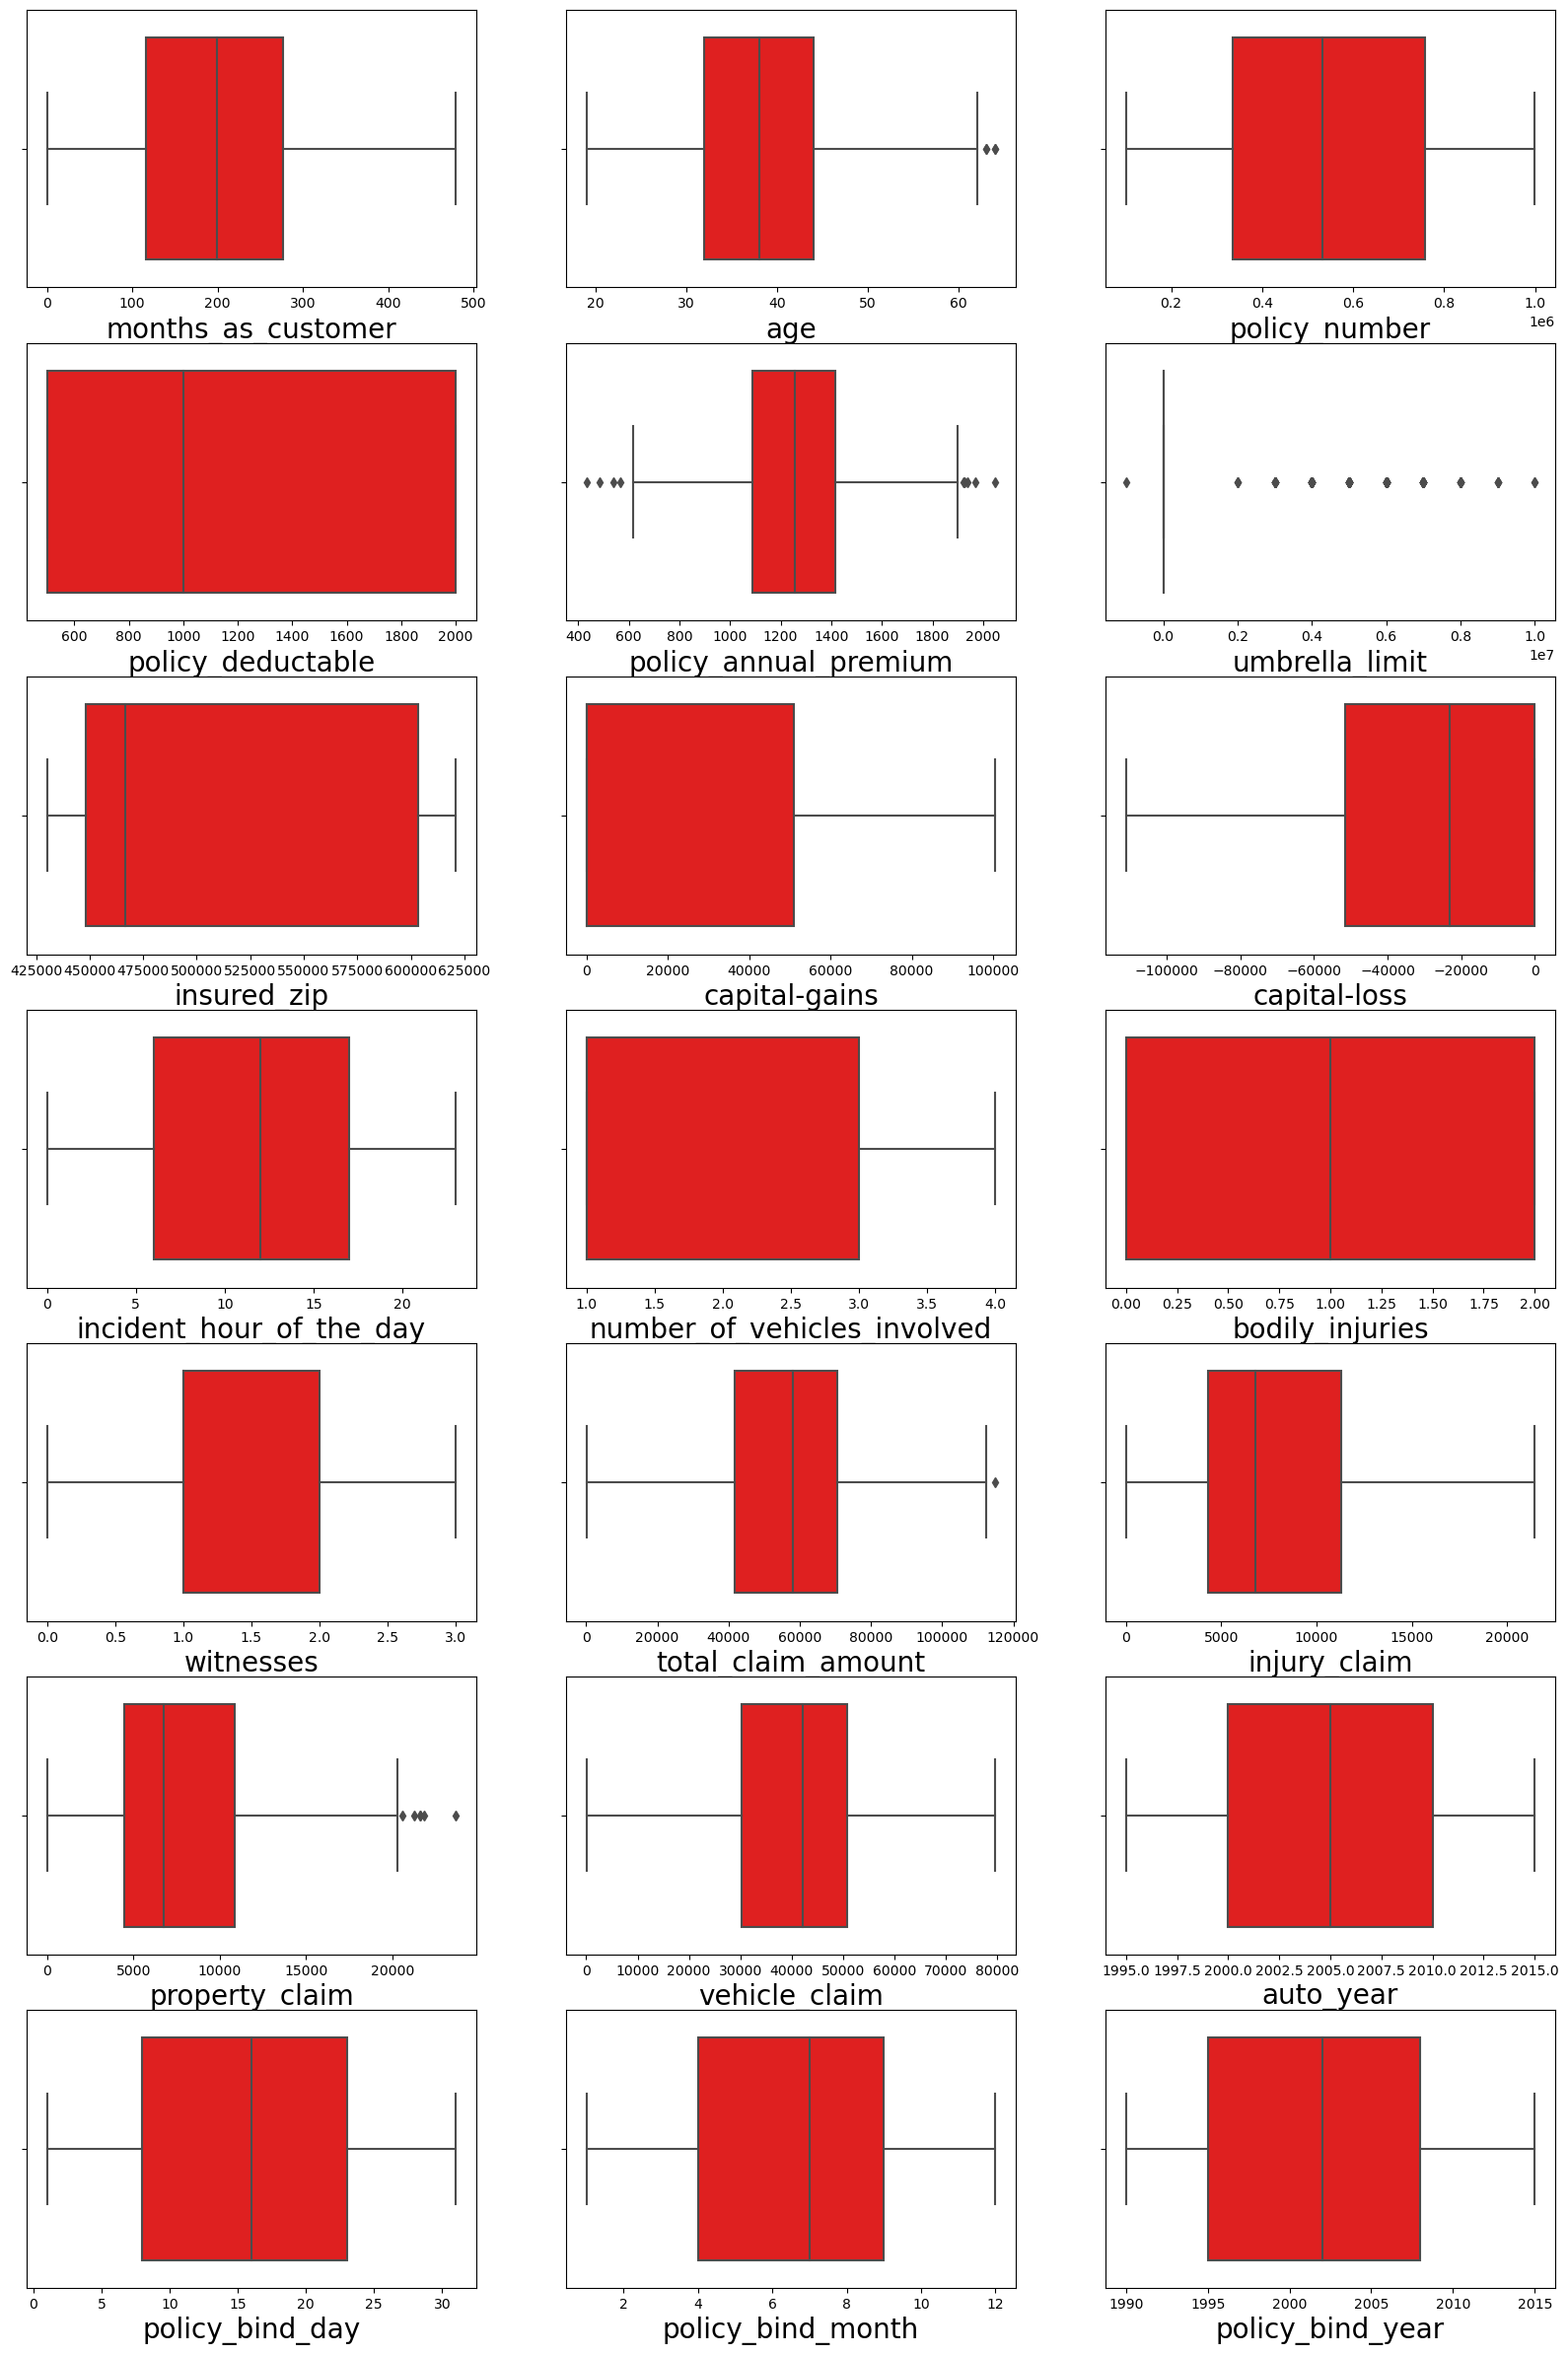

In [75]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [76]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [77]:
df1.shape

(980, 42)

# Skewness of features

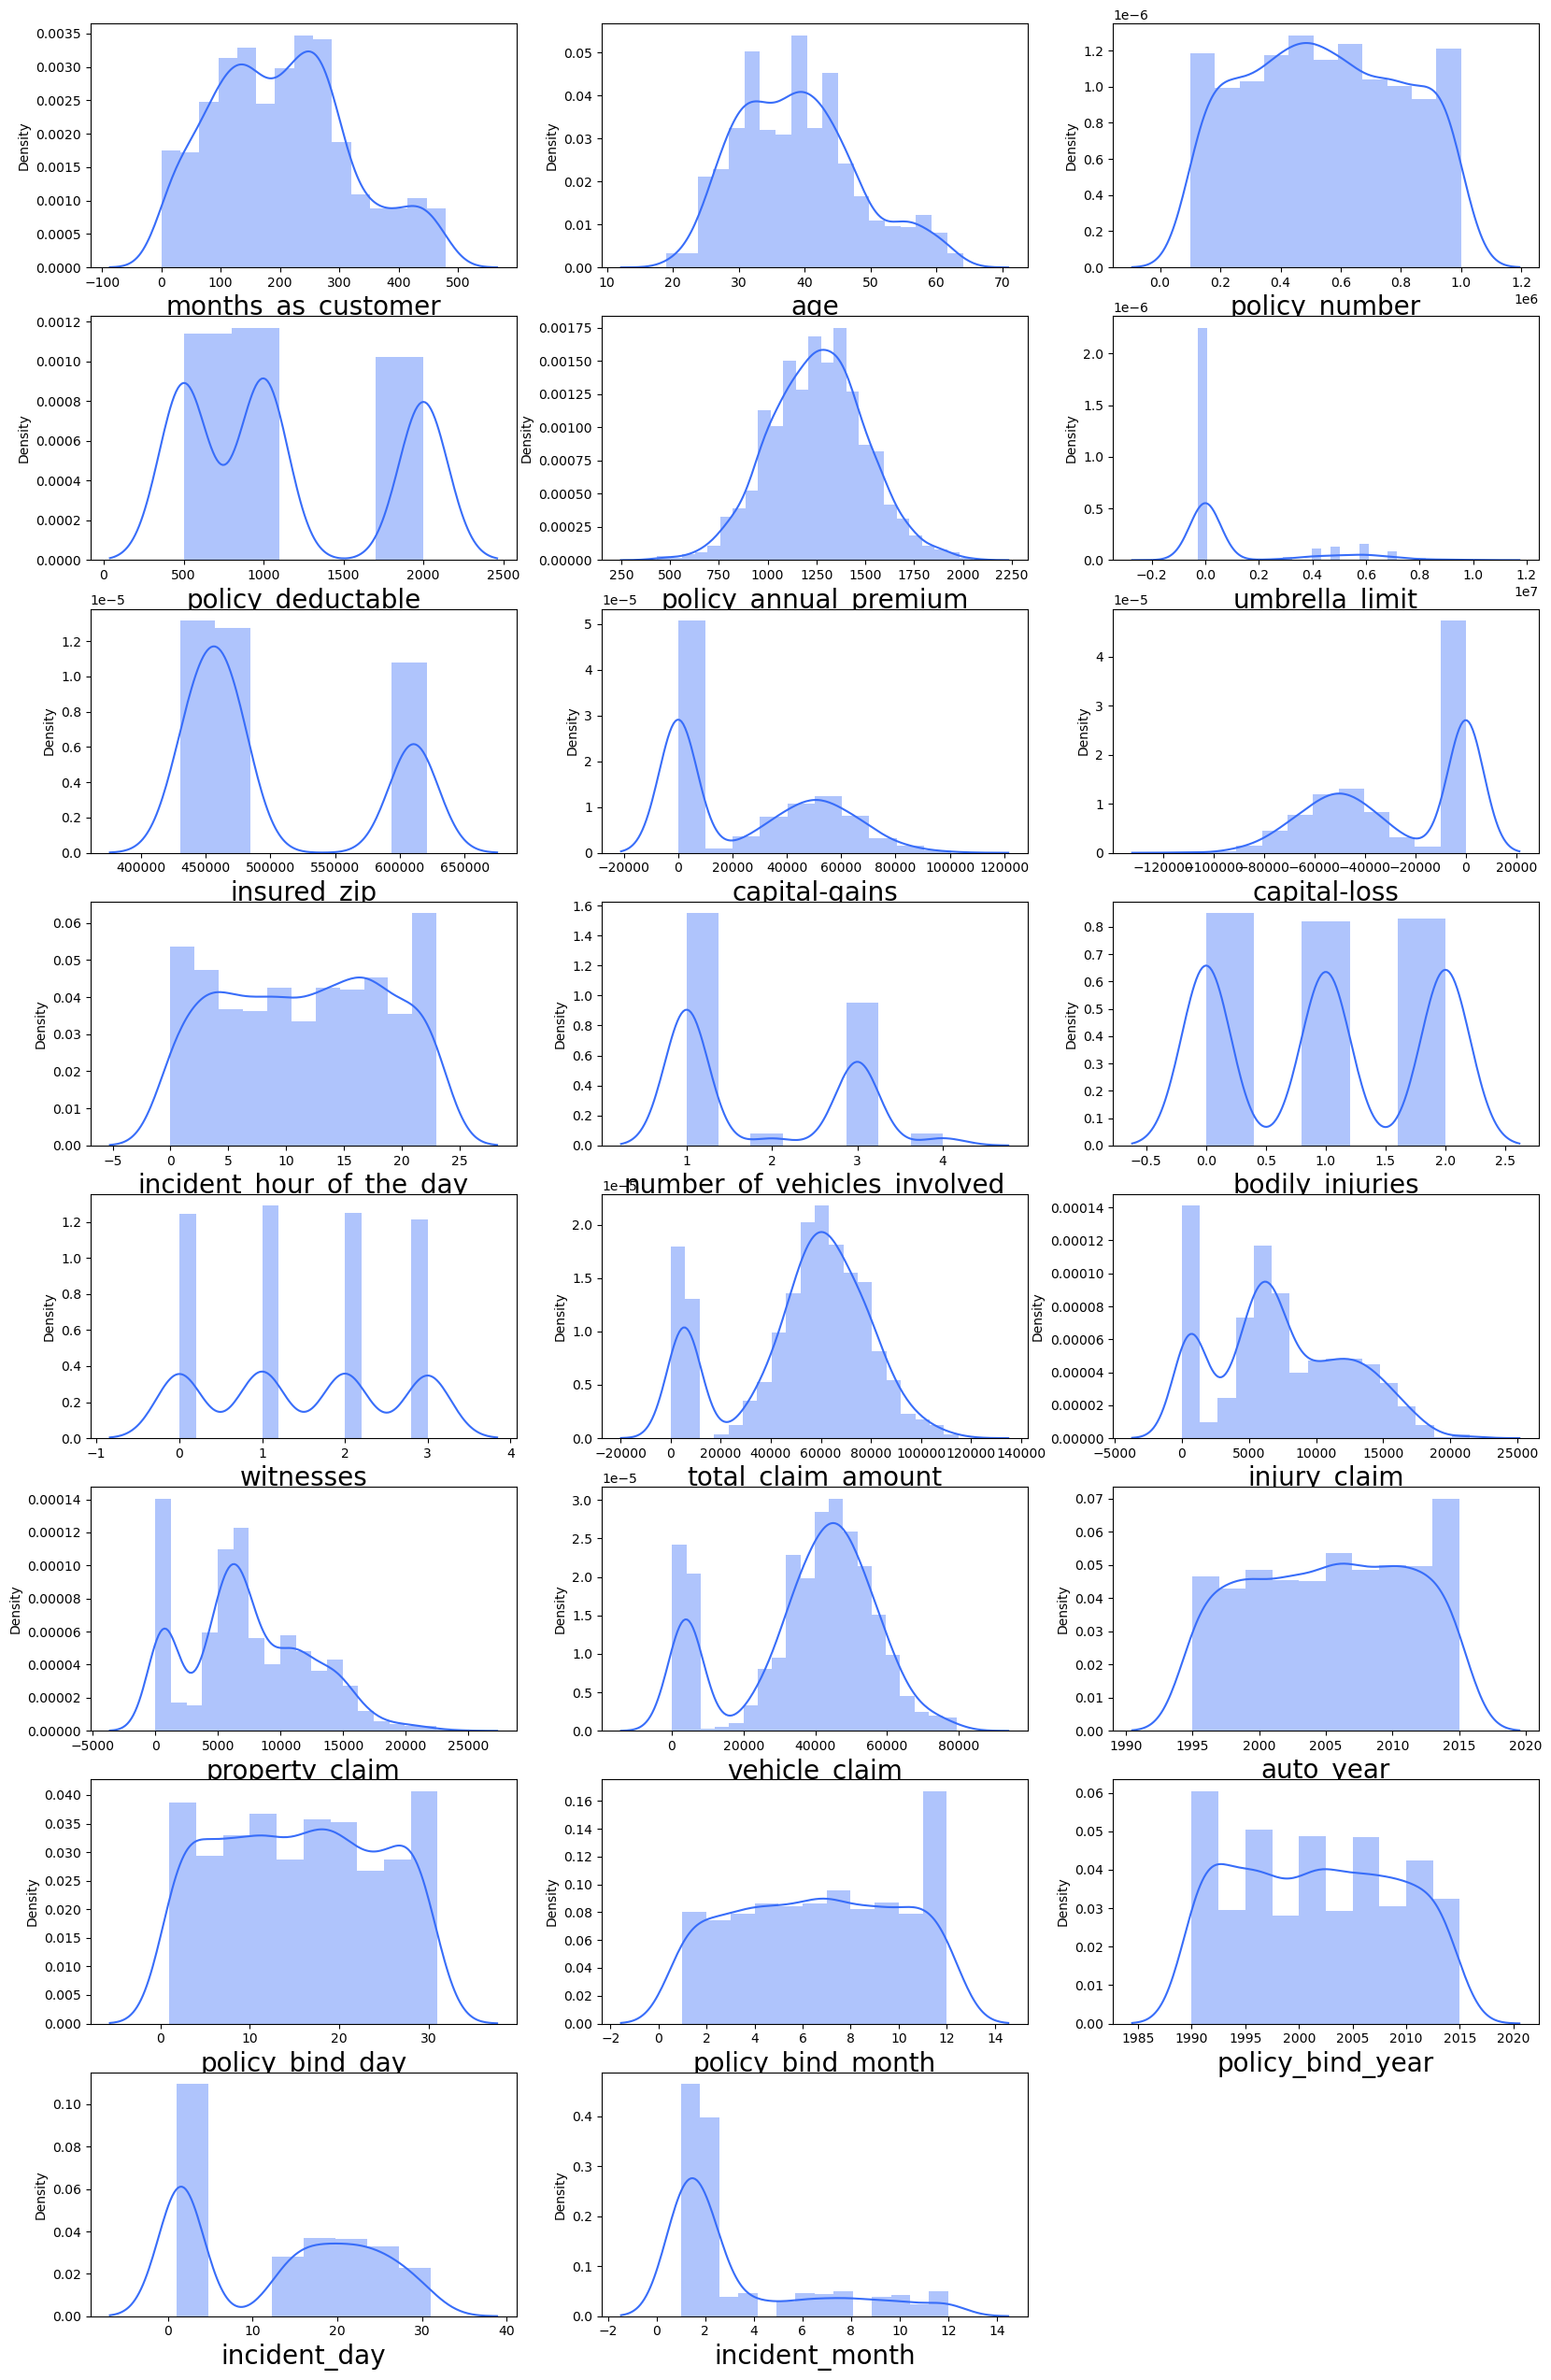

In [78]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in num:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [79]:
#to check the skewness of the feature
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


In [80]:
catgorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catgorical_col.append(i)
        
numerical_col=[]
for i in df.dtypes.index:
     if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
        numerical_col.append(i)

        
datetime_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='datetime64[ns]':
        datetime_col.append(i)

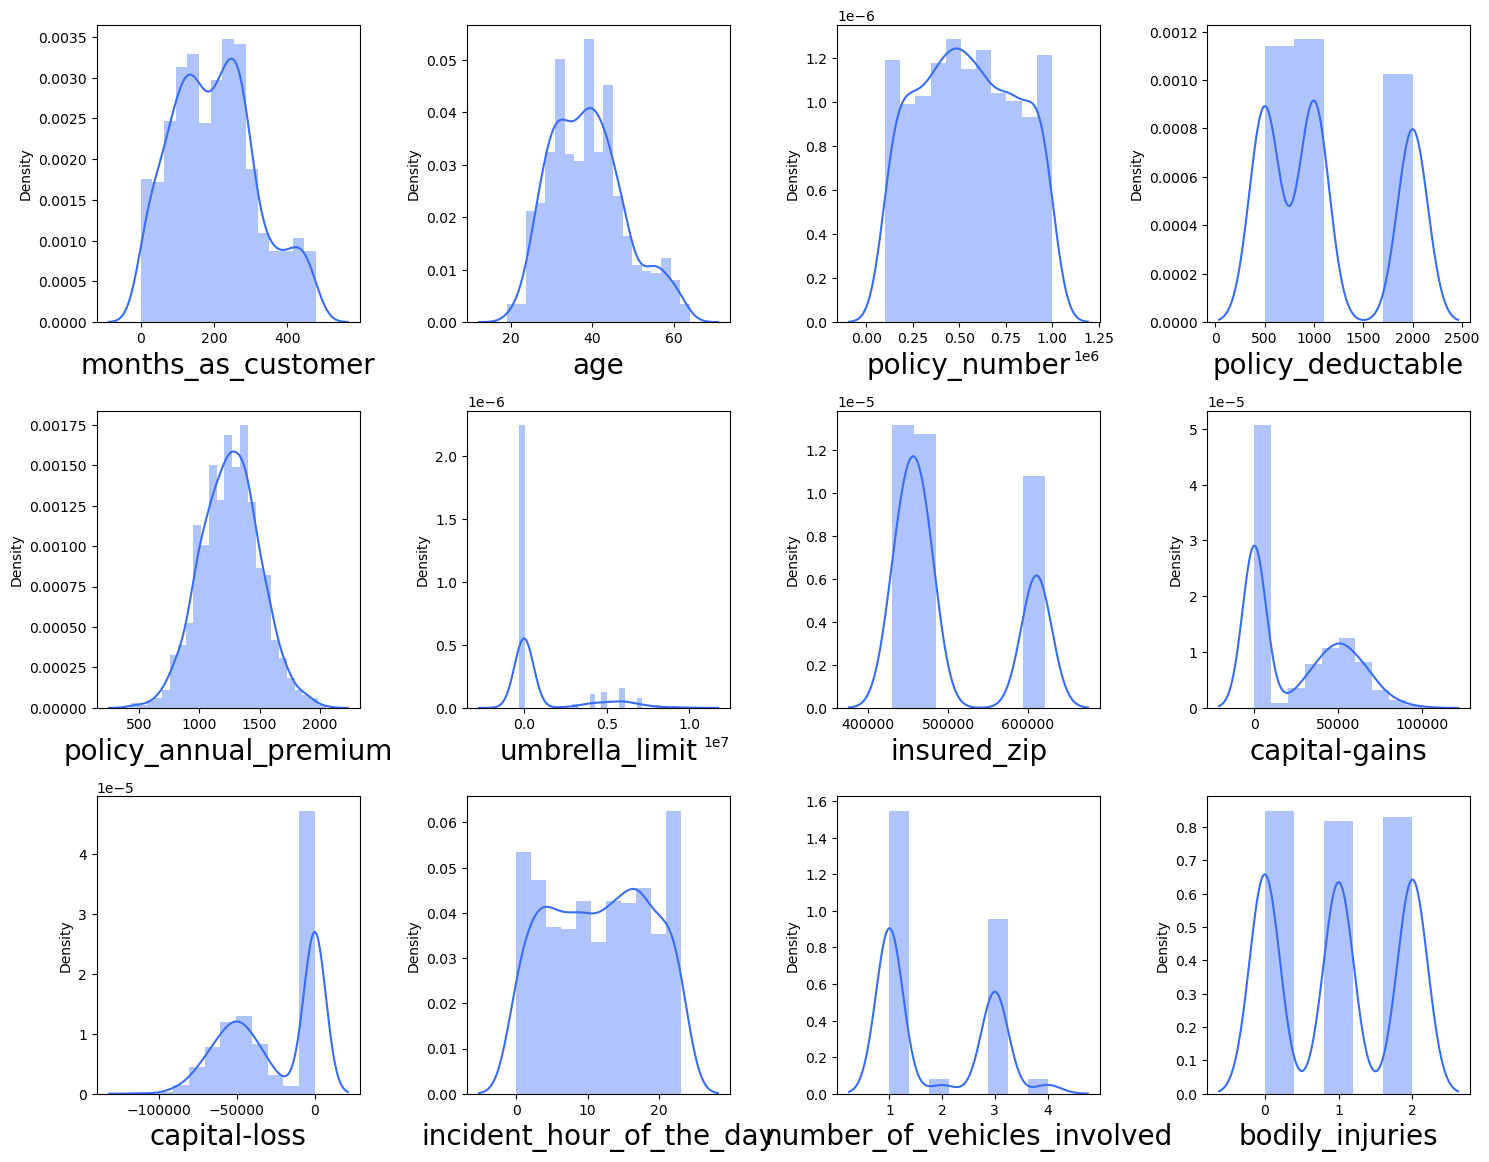

In [81]:
plt.figure(figsize=(15,15))
plotnumber =1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()

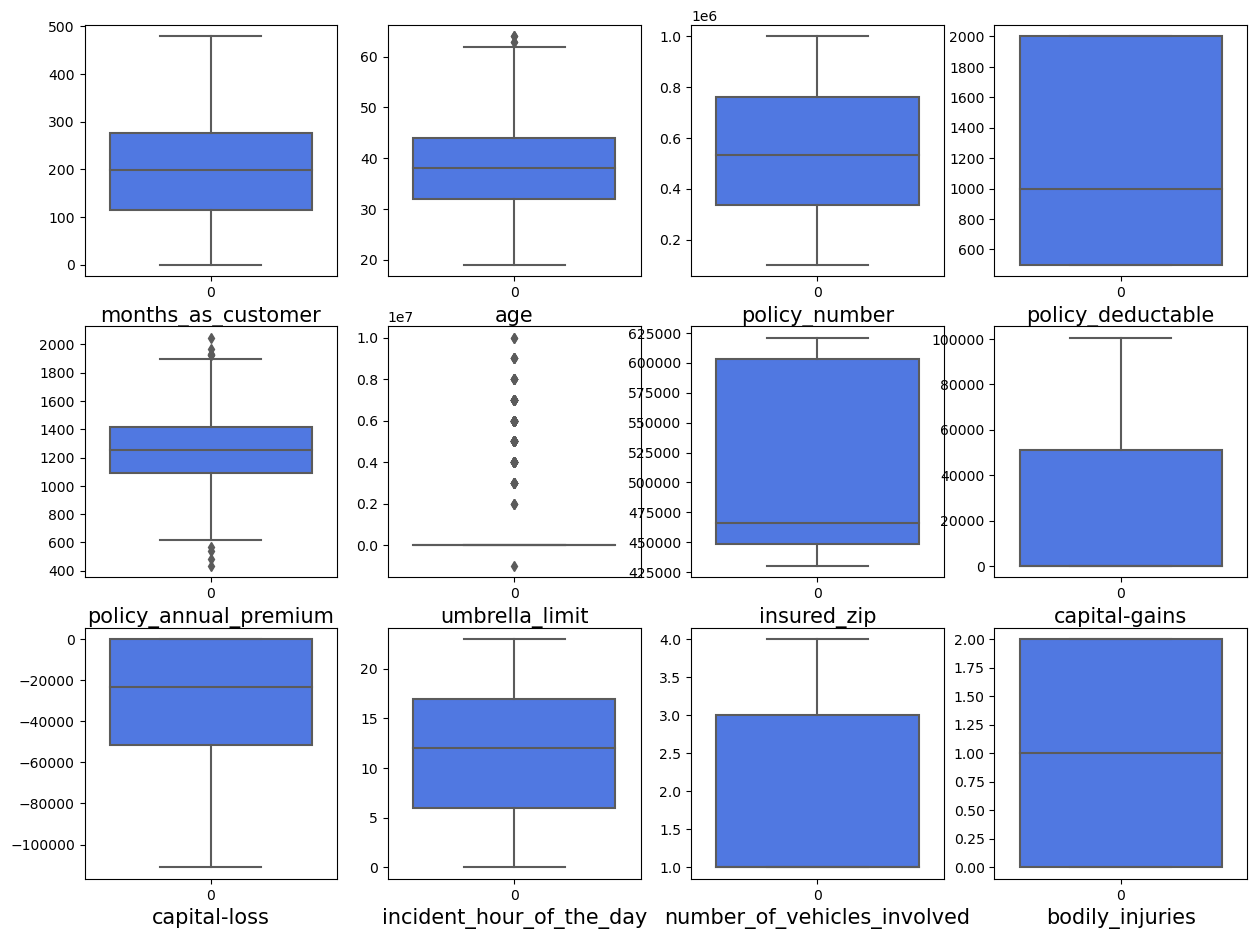

In [82]:
plt.figure(figsize=(15,15))
i=1
for column in numerical_col:
    if i<=12:
        
        
    
        plt.subplot(4,4,i)
    
        ax=sns.boxplot(data=df[column])
    
        plt.xlabel (column,fontsize=15)
        
    i+=1
    
plt.show()

# Encoding

In [83]:
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
for i in catgorical_col:
    df[i]=lm.fit_transform(df[i])

In [84]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,52080,10,1,2004,1,17,10,2014,25,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,3510,8,12,2007,1,27,6,2006,21,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,23100,4,30,2007,0,9,6,2000,22,2
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,50720,3,34,2014,1,25,5,1990,1,10
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,4550,0,31,2009,0,6,6,2014,17,2


In [85]:
x=df.drop(columns='fraud_reported',axis=1)
y=df['fraud_reported']

In [86]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [87]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [88]:
y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [111]:
# Splitting data in target and dependent feature
x = df.drop(['fraud_reported'], axis =1)
y = df['fraud_reported']

In [112]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,1.078140,0.990836,-0.095953,1.187173,0.060937,-0.222383,0.616705,-0.479476,-0.489529,1.076953,...,1.165505,0.749653,0.856466,-1.645743,-0.183440,0.175451,1.015026,1.684992,1.141603,-0.735040
1,0.208995,0.334073,-0.791527,-0.016856,0.060937,1.412784,-0.242521,1.697980,-0.461008,1.076953,...,-1.372696,-1.823346,0.360539,-0.657470,0.315491,1.305938,-0.164894,0.597550,0.758386,-0.735040
2,-0.608002,-1.088913,0.550566,1.187173,-1.182668,1.412784,0.642233,1.697980,-0.984885,-0.928546,...,-0.736072,-0.785565,-0.631315,0.959702,0.315491,-0.728938,-0.164894,-0.218032,0.854190,-0.429664
3,0.452355,0.224613,-1.239334,-1.220886,0.060937,1.412784,0.652886,2.133471,1.491682,-0.928546,...,-0.219722,0.677607,-0.879279,1.319074,1.479664,1.079841,-0.459874,-1.577335,-1.157698,2.013343
4,0.208995,0.552994,-0.695834,-1.220886,1.304542,-0.222383,1.341980,2.133471,1.527808,1.076953,...,-1.399654,-1.768252,-1.623169,1.049545,0.648112,-1.068084,-0.164894,1.684992,0.375169,-0.429664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.539740,1.187173,1.304542,-0.222383,0.222884,-0.479476,-0.975717,-0.928546,...,0.273817,1.224309,-0.135388,-1.196528,0.149180,0.062403,0.130086,-1.441405,0.854190,-0.429664
996,0.704407,0.224613,-1.398429,-1.220886,-1.182668,-0.222383,0.739141,-0.479476,1.492519,-0.928546,...,2.214794,1.821868,1.600357,0.780016,1.645974,-1.633327,-0.459874,1.684992,1.045799,-0.735040
997,-0.642767,-0.541611,1.448920,1.187173,0.060937,-1.039966,0.520739,0.826998,-0.815138,-0.928546,...,0.020826,0.771902,1.104430,-0.028570,-1.513924,0.175451,-1.344813,0.189759,0.949994,-0.735040
998,2.208028,2.523284,-0.047867,-1.220886,1.304542,1.412784,0.411866,1.697980,-0.830250,1.076953,...,-0.451976,-0.073580,-1.375206,-1.286371,-1.181303,0.288500,1.310006,1.277201,1.237407,-0.429664


In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif ['features'] =x.columns 
vif

,vif,features
0,6.854108,months_as_customer
1,6.862288,age
2,1.033964,policy_number
3,1.046703,policy_state
4,1.035158,policy_csl
5,1.043748,policy_deductable
6,1.041864,policy_annual_premium
7,1.039532,umbrella_limit
8,1.030519,insured_zip
9,1.030423,insured_sex


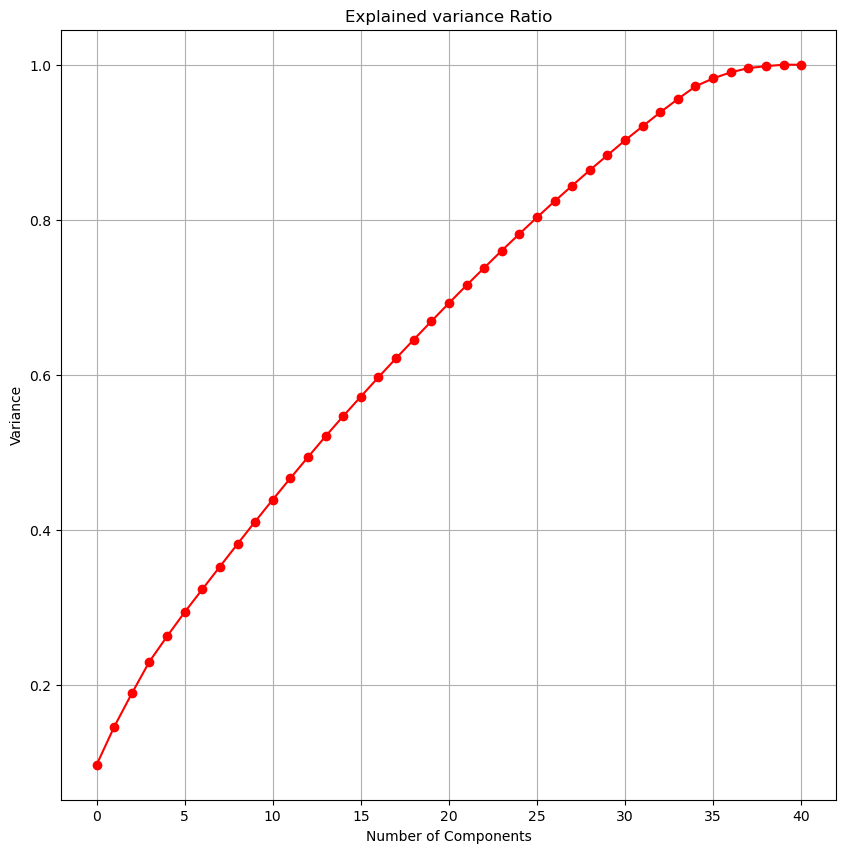

In [114]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(x)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Explained variance Ratio')
plt.grid()

In [115]:
pca = PCA(n_components=28)
x_new = pca.fit_transform(x)
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

# Machine Learning Model Building

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report ,confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)

In [118]:
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (700, 28)
Training target vector size: (700,)
Test feature matrix size: (300, 28)
Test target vector size: (300,)


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [121]:
maxAccu = 0
maxRs = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rnd = RandomForestClassifier()
    rnd.fit(x_train, y_train)
    y_pred = rnd.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)

Best accuracy is 0.82 at random_state 108


# Logistic Regression

In [122]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR= LR.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predLR)))
print('\n')
print(confusion_matrix(y_test, predLR))

Accuracy score 0.78


[[207  22]
 [ 44  27]]


# Random Forest Classifier

In [123]:
Rnd= RandomForestClassifier()
Rnd.fit(x_train, y_train)
predRnd= Rnd.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predRnd)))
print('\n')
print(confusion_matrix(y_test, predRnd))

Accuracy score 0.79


[[215  14]
 [ 49  22]]


# ExtraTrees Classifier

In [124]:
Etr= ExtraTreesClassifier()
Etr.fit(x_train, y_train)
predEtr= Etr.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predEtr)))
print('\n')
print(confusion_matrix(y_test, predEtr))

Accuracy score 0.7566666666666667


[[220   9]
 [ 64   7]]


# SVC

In [125]:
svc=SVC()
svc.fit(x_train, y_train)
predsvc=svc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predsvc)))
print('\n')

print(confusion_matrix(y_test, predsvc))

Accuracy score 0.77


[[226   3]
 [ 66   5]]


# GradientBoostingClassifier

In [128]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)
predgbc =gbc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predgbc)))
print('\n')

print(confusion_matrix(y_test, predgbc))

Accuracy score 0.7933333333333333


[[191  38]
 [ 24  47]]


# AdaBoostClassifier

In [129]:
adaboost= AdaBoostClassifier()
adaboost.fit(x_train, y_train)
predadaboost =adaboost.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predadaboost)))
print('\n')

print(confusion_matrix(y_test, predadaboost))

Accuracy score 0.7766666666666666


[[199  30]
 [ 37  34]]


In [139]:
bagging=BaggingClassifier()
bagging.fit(x_train, y_train)
predbagging =bagging.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predbagging)))
print('\n')
print(confusion_matrix(y_test, predbagging))

Accuracy score 0.7933333333333333


[[192  37]
 [ 25  46]]


# Cross Validation Score

In [133]:
print('LogisticRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Accuracy Score : ', accuracy_score(y_test,predLR))
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predLR)- score.mean())

LogisticRegression 


[0.775 0.79  0.74  0.8   0.8  ]
0.7809999999999999
Accuracy Score :  0.78
Difference between Accuracy score  and cross validation score is -  -0.0009999999999998899


In [131]:
print(' RandomForestClassifie')
print('\n')

score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Accuracy Score : ', accuracy_score(y_test,predRnd))
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

 RandomForestClassifie


[0.785 0.78  0.765 0.76  0.78 ]
0.774
Accuracy Score :  0.79
Difference between Accuracy score  and cross validation score is -  0.016000000000000014


In [134]:
print('ExtraTreesClassifier ')
print('\n')
score=cross_val_score(Etr, x, y)
print(score)
print(score.mean())
print('Accuracy Score : ', accuracy_score(y_test,predEtr))
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predEtr)- score.mean())

ExtraTreesClassifier 


[0.775 0.755 0.73  0.75  0.74 ]
0.75
Accuracy Score :  0.7566666666666667
Difference between Accuracy score  and cross validation score is -  0.00666666666666671


In [135]:
print('SVC ')
print('\n')
score=cross_val_score(svc, x, y)
print(score)
print(score.mean())
print('Accuracy Score : ', accuracy_score(y_test,predsvc))
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predsvc)- score.mean())

SVC 


[0.755 0.735 0.745 0.755 0.755]
0.7489999999999999
Accuracy Score :  0.77
Difference between Accuracy score  and cross validation score is -  0.02100000000000013


In [136]:
print('GradientBoostingClassifier ')
print('\n')
score=cross_val_score(gbc, x, y)
print(score)
print(score.mean())
print('Accuracy Score : ', accuracy_score(y_test,predgbc))
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predgbc)- score.mean())

GradientBoostingClassifier 


[0.81  0.785 0.785 0.85  0.855]
0.8170000000000002
Accuracy Score :  0.7933333333333333
Difference between Accuracy score  and cross validation score is -  -0.023666666666666836


In [137]:
print('AdaBoostClassifier ')
print('\n')
score=cross_val_score(adaboost, x, y)
print(score)
print(score.mean())
print('Accuracy Score : ', accuracy_score(y_test,predadaboost))
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predadaboost)- score.mean())

AdaBoostClassifier 


[0.795 0.785 0.755 0.805 0.835]
0.795
Accuracy Score :  0.7766666666666666
Difference between Accuracy score  and cross validation score is -  -0.018333333333333424


In [140]:
print('BaggingClassifier ')
print('\n')
score=cross_val_score(bagging, x, y)
print(score)
print(score.mean())
print('Accuracy Score : ', accuracy_score(y_test,predbagging))
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predbagging)- score.mean())

BaggingClassifier 


[0.795 0.82  0.81  0.855 0.845]
0.825
Accuracy Score :  0.7933333333333333
Difference between Accuracy score  and cross validation score is -  -0.03166666666666662


In [141]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gdsv = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
gdsv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [142]:
gdsv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [143]:
Final_model= GradientBoostingClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=10,n_estimators=150)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)

82.33333333333334


In [144]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [145]:
print(classification_report(y_test,y_pred))   # support means sample to x_test 

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       229
           1       0.54      0.27      0.36        71

    accuracy                           0.77       300
   macro avg       0.67      0.60      0.61       300
weighted avg       0.74      0.77      0.74       300



In [146]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [147]:
print('threshold',threshold)
print('False possitive rate',fpr)
print('True possitive rate',tpr)

threshold [2 1 0]
False possitive rate [0.       0.069869 1.      ]
True possitive rate [0.         0.26760563 1.        ]


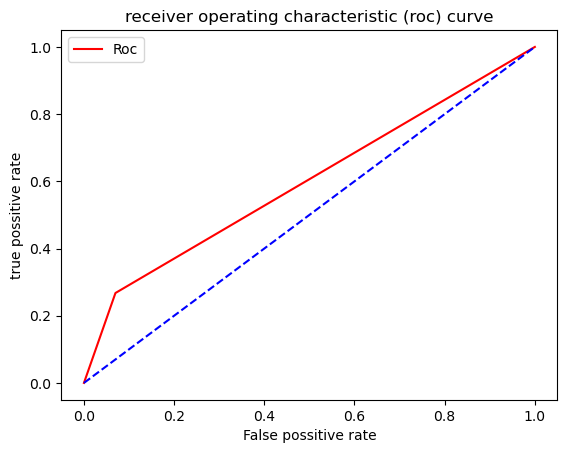

In [148]:
plt.plot(fpr,tpr, color='red', label='Roc')
plt.plot([0,1],[0,1], color='blue', linestyle='--')
plt.xlabel('False possitive rate')
plt.ylabel('true possitive rate')
plt.title('receiver operating characteristic (roc) curve')
plt.legend()
plt.show()

In [149]:
# how  much area auc curve covered
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.5988683190848146